In [1]:
import pandas as pd

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import RobustScaler

import pickle

In [2]:
player_name = 'arrojeria_esther'

In [3]:
record_date = '20230908'

In [4]:
match = pd.read_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_match_attributes.csv',index_col=0)
match

,seconds,date,hr,activity_load_2d,activity_load_3d
0,2520.302,[2023-09-08 19:59:59 954],131.0,0.0271,0.0341
1,2521.302,[2023-09-08 20:00:00 954],130.0,0.1677,0.1908
2,2522.302,[2023-09-08 20:00:01 954],130.0,0.0569,0.0672
3,2523.302,[2023-09-08 20:00:02 954],130.0,0.0925,0.1454
4,2524.302,[2023-09-08 20:00:03 954],130.0,0.1308,0.2314
...,...,...,...,...,...
5090,7615.181,[2023-09-08 21:24:54 833],81.0,NaN,NaN
5091,7616.164,[2023-09-08 21:24:55 816],81.0,NaN,NaN
5092,7617.182,[2023-09-08 21:24:56 834],81.0,NaN,NaN
5093,7618.182,[2023-09-08 21:24:57 834],81.0,NaN,NaN


In [5]:
match = match[~match['activity_load_3d'].isnull()]

In [6]:
# normalizar los datos con robust scaler
scaler = RobustScaler()
match_rs = scaler.fit_transform(match.drop(['seconds','date'],axis=1))

In [7]:
# cargar el modelo con pickle
file = open('../../../../modelos/supervised/rf_model.pickle', 'rb')
rf = pickle.load(file)
file.close()

In [8]:
# hacer el predict
y_pred = rf.predict(match_rs)

/home/jvillamor10/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


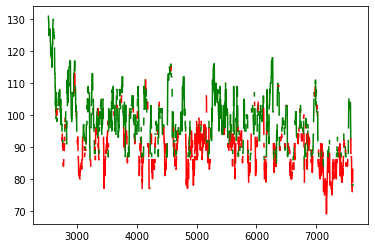

In [9]:
# mostrar gráfico
import matplotlib.pyplot as plt

colores = {0: 'red', 1: 'green', None: 'black'}
x = match['seconds']
y = match['hr']

valores_convertidos = [colores[valor] for valor in y_pred]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Initialize variables for segment plotting
segment_start = 0
current_color = valores_convertidos[0]

# Iterate through the data to plot segments with different colors
for i in range(1, len(x)):
    if valores_convertidos[i] != current_color:
        # Plot the current segment with the current color
        ax.plot(x[segment_start:i], y[segment_start:i], linestyle='-', color=current_color)
        
        # Update the segment start and current color
        segment_start = i
        current_color = valores_convertidos[i]

# Plot the last segment
ax.plot(x[segment_start:], y[segment_start:], linestyle='-', color=current_color)

plt.show()